In [2]:
import pandas as pd
import numpy as np


### Importing the DataSet

In [3]:
Customer=pd.read_csv('Customer.csv')
Customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
Product_Hierarchy=pd.read_csv('prod_cat_info.csv')
Product_Hierarchy.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [5]:
Transactions=pd.read_csv('Transactions.csv')
Transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


### Merge the datasets 

In [6]:
Customer_product_trans=pd.merge(left=Customer,right=Transactions, how='inner',left_on='customer_Id',right_on="cust_id", indicator=True)
Customer_product_trans.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,both


In [7]:
Customer_Final = pd.merge(left = Customer_product_trans,
                          right = Product_Hierarchy,
                          left_on = 'prod_cat_code',
                          right_on = 'prod_cat_code',
                          how = 'inner'
                          )
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic


# Q2 Prepare a summary report

### Create UDFS

In [8]:
def continuous_var_summary(x):
    return pd.Series([x.min(),x.quantile(0.25),x.median(),x.quantile(0.75),x.max()], 
                   index=['Min','Q1','Median','Q3','Max'])

In [9]:
def catagorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series(Mode.iloc[0,1],
                    index=['Frequency'])

In [10]:
#Separate continuous and Catgorical Varible
retail_conti_var=Customer_Final.loc[:,(Customer_Final.dtypes=='float64') | (Customer_Final.dtypes=='int64')]
retail_cat_var=Customer_Final.loc[:,Customer_Final.dtypes=='object']

### a)Get the column names and their corresponding data types


In [11]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

### b. Top/Bottom 10 observations

In [12]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [13]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [14]:
retail_conti_var.apply(continuous_var_summary).round(1)

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
Min,266783.0,1.0,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.4,-8270.9,1.0
Q1,268956.0,3.0,2.492150e+10,268956.0,4.0,3.0,1.0,313.0,98.3,762.4,4.0
Median,270982.0,5.0,5.011083e+10,270982.0,7.0,5.0,3.0,713.0,199.9,1761.4,7.0
Q3,273120.0,8.0,7.528121e+10,273120.0,10.0,5.0,4.0,1109.0,367.0,3585.7,10.0
Max,275265.0,10.0,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.5,8287.5,12.0


### d) Frequency table for all categorical varible

In [15]:
retail_cat_var.apply(catagorical_var_summary)

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
Frequency,156,51051,153,40185,36414,7957


## 3 Generate histograms for all continuous variables and frequency bars for categorical variables

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
def count_chart(x):
    sns.countplot(x)
    plt.show()

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


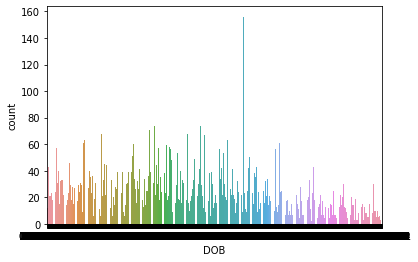

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


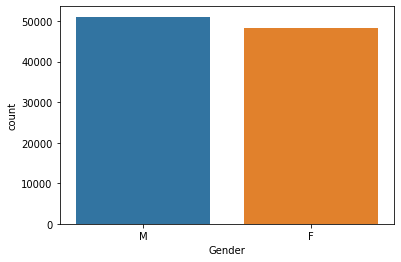

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


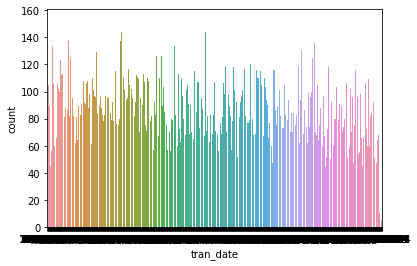

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


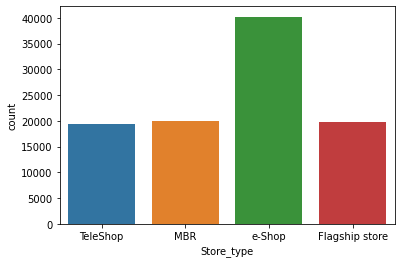

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


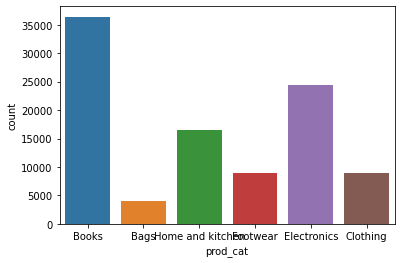

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


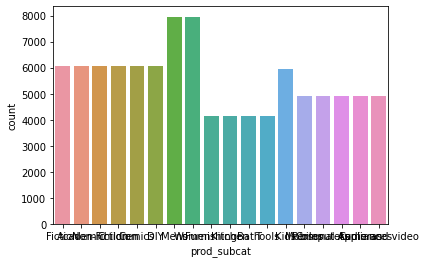

DOB            None
Gender         None
tran_date      None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

In [18]:
retail_cat_var.apply(count_chart)

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


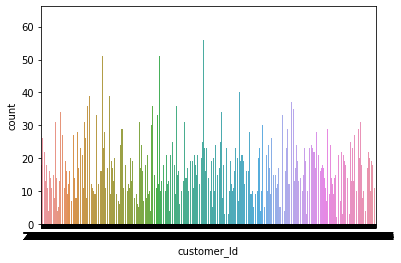

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


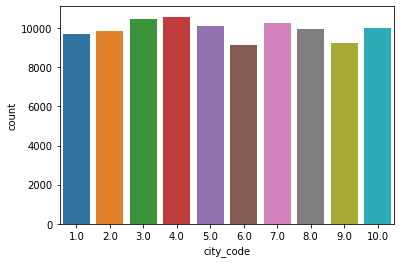

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


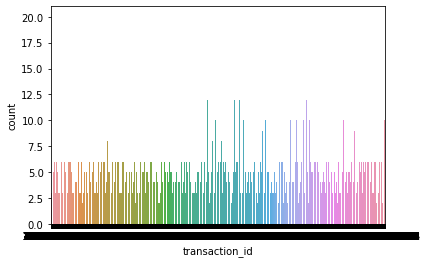

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


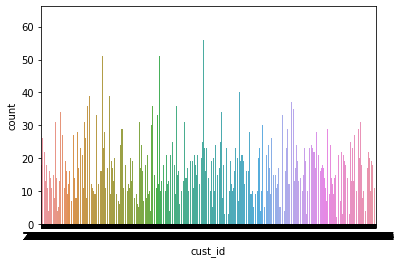

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


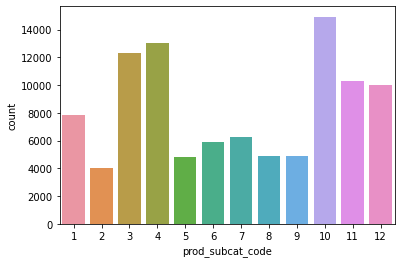

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


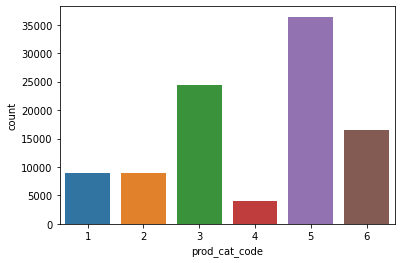

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


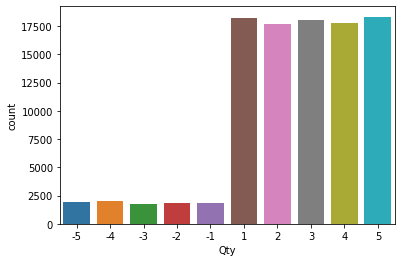

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


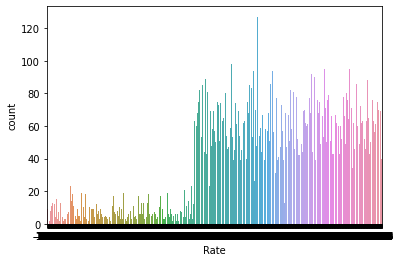

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


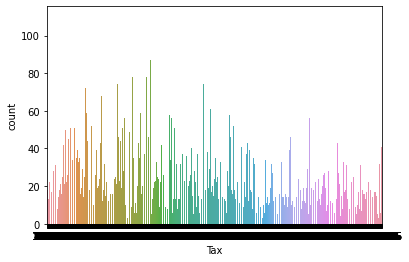

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


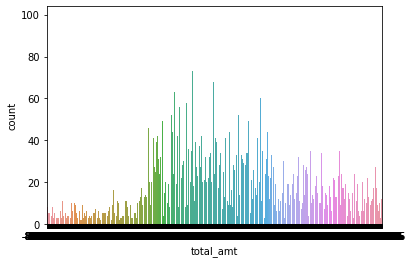

C:\Users\Sarita\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


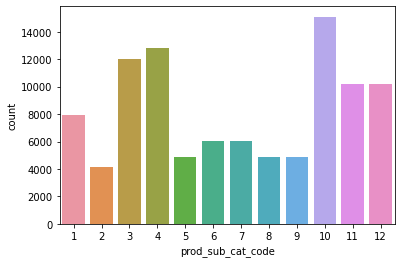

customer_Id          None
city_code            None
transaction_id       None
cust_id              None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
prod_sub_cat_code    None
dtype: object

In [19]:
retail_conti_var.apply(count_chart)

 # 4 Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [43]:
Customer_Final['tran_date']=pd.to_datetime(Customer_Final['tran_date'])

In [50]:
Customer_Final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction


###  b. Count of transactions where the total amount of transaction was negative

In [20]:
Customer_Final.loc[(Customer_Final.total_amt < 0)].count().T

customer_Id          9294
DOB                  9294
Gender               9291
city_code            9294
transaction_id       9294
cust_id              9294
tran_date            9294
prod_subcat_code     9294
prod_cat_code        9294
Qty                  9294
Rate                 9294
Tax                  9294
total_amt            9294
Store_type           9294
_merge               9294
prod_cat             9294
prod_sub_cat_code    9294
prod_subcat          9294
dtype: int64

## 5. Analyze which product categories are more popular among females vs male customers

In [36]:
Male=Male=Customer_Final.loc[Customer_Final['Gender']=='M']
popular_product=Male.groupby(['prod_cat'])['total_amt'].sum()
most_popular_product=popular_product.nlargest(1)
display("Most Popular product In Male",most_popular_product)

'Most Popular product In Male'

prod_cat
Books    39875836.65
Name: total_amt, dtype: float64

In [42]:
Female=Customer_Final.loc[Customer_Final['Gender']=='F']
popular_product=Female.groupby(['prod_cat'])['total_amt'].sum()
most_popular_product1=popular_product.nlargest(1)
display("Most Popular product In Female",most_popular_product)

'Most Popular product In Female'

prod_cat
Books    36988153.41
Name: total_amt, dtype: float64

## 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [73]:
max_cust = Customer['city_code'].value_counts()
max_cust = max_cust.nlargest(1)
max_cust

3.0    595
Name: city_code, dtype: int64

In [75]:
total_customer=Customer['ustomer_Id'].count()
total_customer

5647

In [78]:
percentage_of_customer=round((t/(total_customer))*100,2)
print( "city code has maximum percentage of customer id :",percentage_of_customer)

city code has maximum percentage of customer id : 3.0    10.54
Name: city_code, dtype: float64


## 7. Which store type sells the maximum products by value and by quantity?


In [82]:
Customer_Final.groupby('Store_type')['total_amt','Qty'].agg(['max'])

C:\Users\Sarita\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,total_amt,Qty
,max,max
Store_type,,
Flagship store,8254.35,5
MBR,8287.50,5
TeleShop,8287.50,5
e-Shop,8287.50,5


In [89]:
Customer_Final.sort_values(by=["total_amt","Qty"],ascending=False)["Store_type"].head(1)

47986    TeleShop
Name: Store_type, dtype: object

## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [90]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 14658949.89


In [91]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction


## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [93]:
Customer_Final[(Customer_Final.Gender == 'M') & (Customer_Final.prod_cat == 'Electronics')].total_amt.sum()

28515547.125

## 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [94]:
Customer_Final[Customer_Final.transaction_id >0]

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women


In [95]:
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)

Total customers having more than 10 unique transactions are -  20876


## 11. For all customers aged between 25 - 35, find out:

In [104]:

curr_year = pd.to_datetime('today').year # Extract current year

ob_year = pd.to_datetime(df['DOB']).dt.year # convert DOB date into year

x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - ob_year

y = curr_year - dob_year 
df['age'] = (np.where(dob_year > curr_year,v,y))
df

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,age
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction,51
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic,51
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction,51
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children,51
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,1,Women,29
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,both,Clothing,3,Kids,29
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,4,Mens,29
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,both,Clothing,1,Women,29


### a. What was the total amount spent for “Electronics” and “Books” product categories?


In [105]:
df.loc[(df.prod_cat=='Books') | (df.prod_cat=='Electronics')]['total_amt'].sum()

130548482.415

 ### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [118]:
Customer_Final['trans_date']=pd.to_datetime(Customer_Final['tran_date'])

In [122]:
Customer_Final[(Customer_Final['tran_date']>'2014-01-01') & (Customer_Final['tran_date']<'2014-03-01')]['total_amt'].sum()

5591225.965